In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, learning_curve
from math import sqrt
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

## Preprocess

In [3]:
data = pd.read_csv('Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
clm_name_dict = dict()
for name in data.columns:
  formatted_name = name
  if name[0] == ' ':
    formatted_name = formatted_name[1:]
  if name[-1] == ' ':
    formatted_name = formatted_name[:-1]
  formatted_name = formatted_name.replace(' ', '_')
  clm_name_dict[name] = formatted_name

data.rename(columns = clm_name_dict, inplace = True)

In [5]:
data.rename(columns = {'thinness__1-19_years':'thinness_1-19_years'}, inplace = True)

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [8]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# import package
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization
from tensorflow.keras import optimizers
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
def preprocess(df):
    # for clm in df.columns:
    #   if df[clm].dtypes == 'O':
    #     df[clm] = df[clm].fillna(df[clm].mode()[0])
    #   else:
    #     df[clm] = df[clm].fillna(df[clm].mean())
    df = df.dropna()
    df = df.reset_index(drop=True)
    df = pd.get_dummies(df)
    # # categorical features into numeric
    # df['Status'] = df['Status'].map( {'Developing': '1', 'Developing': '0'} )#.astype(int)
    # df['Status'] = pd.to_numeric(df['Status'], downcast='integer')

    # # one-hot encoding
    # country_one_hot = pd.get_dummies(df['Country'], prefix='country')
    # df = df.drop('Country', axis=1)
    # df = df.join(country_one_hot)
    return df

In [11]:
data1 = preprocess(data)

## Train-test split

In [12]:
X = data1.loc[:, data1.columns != 'Life_expectancy']
X = X.loc[:, X.columns != 'Year']
y = data1.Life_expectancy

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=40)
print(X_train.shape); print(X_test.shape)

(1484, 153)
(165, 153)


## Standardization

In [14]:
# scale train data
scale = StandardScaler()
x_train = scale.fit_transform(X_train)

# scale test data
x_test = scale.transform(X_test)

## Model Training

In [15]:
X_train

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
176,21.0,0,4.90,251.658693,96.0,0,41.4,0,96.0,4.50,...,0,0,0,0,0,0,0,0,0,1
1070,242.0,2,0.01,751.398272,88.0,477,34.9,3,88.0,8.93,...,0,0,0,0,0,0,0,0,0,1
683,191.0,159,0.06,72.015932,66.0,20422,19.7,194,78.0,2.91,...,0,0,0,0,0,0,0,0,0,1
1128,177.0,369,0.03,5.447134,65.0,1129,2.6,460,7.0,3.26,...,0,0,0,0,0,0,0,0,0,1
227,652.0,2,4.90,469.582390,91.0,1,32.2,4,96.0,5.56,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,271.0,2,1.31,56.056864,98.0,18,4.5,2,98.0,6.18,...,0,0,0,0,0,0,0,0,0,1
165,189.0,0,6.66,582.802718,98.0,0,48.5,0,98.0,5.45,...,0,0,0,0,0,0,0,0,0,1
7,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,...,0,0,0,0,0,0,0,0,0,1
219,3.0,2,0.01,12.834474,95.0,7,36.2,3,96.0,6.27,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# Define the model architecture
# input_shape = (None,21)
model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)])
# normalizer = Normalization(input_shape=(None, 154), axis=None)
# normalizer.adapt(X_train)
# model = tf.keras.Sequential([
#     normalizer,
#     Dense(units=1)
# ])

# Compile the model
model.compile(loss='mse', optimizer='adam')
# model.build()
# # Print the model summary
# model.summary()
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)
history

Epoch 1/100
38/38 [==============================] - 2s 8ms/step - loss: 4513.5356 - val_loss: 3721.8804
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 2364.3542 - val_loss: 611.4962
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 172.5237 - val_loss: 53.9486
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 36.0334 - val_loss: 22.8478
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 15.0523 - val_loss: 14.3235
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 9.5849 - val_loss: 11.0379
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 7.4496 - val_loss: 9.3216
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 6.4541 - val_loss: 8.2548
Epoch 9/100
38/38 [==============================] - 0s 3ms/step - loss: 5.8228 - val_loss: 7.4139
Epoch 10/100
38/38 [==============================] - 0s 3ms/step - loss: 5.1764 - val_los

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 5000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MSE]')
  plt.legend()
  plt.grid(True)

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,2.496044,4.210570,95
96,2.278399,4.260629,96
97,2.362383,4.699069,97
98,2.262991,4.064852,98
99,2.646938,4.135466,99


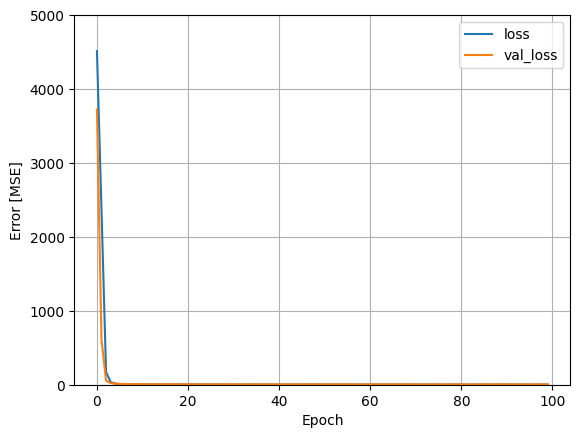

In [19]:
plot_loss(history)

In [20]:
MSE_train = model.evaluate(x_train,y_train)
r2square_train = 1 - MSE_train/np.var(y_train)

MSE_test = model.evaluate(x_test,y_test)
r2square_test = 1 - MSE_test/np.var(y_test)
print(f"Train performance -> R2^2: {r2square_train}")
print(f"Test performance -> R2^2: {r2square_test}")

6/6 [==============================] - 0s 2ms/step - loss: 4.0585
Train performance -> R2^2: 0.9685210750534222
Test performance -> R2^2: 0.95577227341527


## SHAP

In [21]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 20.9 MB/s eta 0:00:00


In [22]:
import shap

## Deep SHAP

In [23]:
deep_explainer = shap.DeepExplainer(model, x_train)
deep_shap_values = deep_explainer.shap_values(x_test)

array([[-1.18721602, -0.2672373 ,  0.09547896, ..., -0.09028939,
        -0.4071243 ,  0.4071243 ],
       [ 0.58260478, -0.2507557 , -1.1186091 , ..., -0.09028939,
        -0.4071243 ,  0.4071243 ],
       [ 0.17418459,  1.04304954, -1.10619511, ..., -0.09028939,
        -0.4071243 ,  0.4071243 ],
       ...,
       [ 0.94297553,  0.39202652, -1.1136435 , ..., -0.09028939,
        -0.4071243 ,  0.4071243 ],
       [-1.33136432, -0.2507557 , -1.1186091 , ..., -0.09028939,
        -0.4071243 ,  0.4071243 ],
       [ 0.15015988, -0.2672373 , -0.84798415, ..., -0.09028939,
        -0.4071243 ,  0.4071243 ]])>]. Consider rewriting this model with the Functional API.
array([[-1.24327369, -0.2589965 , -0.13790402, ..., -0.09028939,
        -0.4071243 ,  0.4071243 ],
       [-1.29933137, -0.2672373 ,  1.78874697, ..., -0.09028939,
         2.4562523 , -2.4562523 ],
       [-1.29933137, -0.2507557 ,  1.42129292, ..., -0.09028939,
         2.4562523 , -2.4562523 ],
       ...,
       [ 0.902934

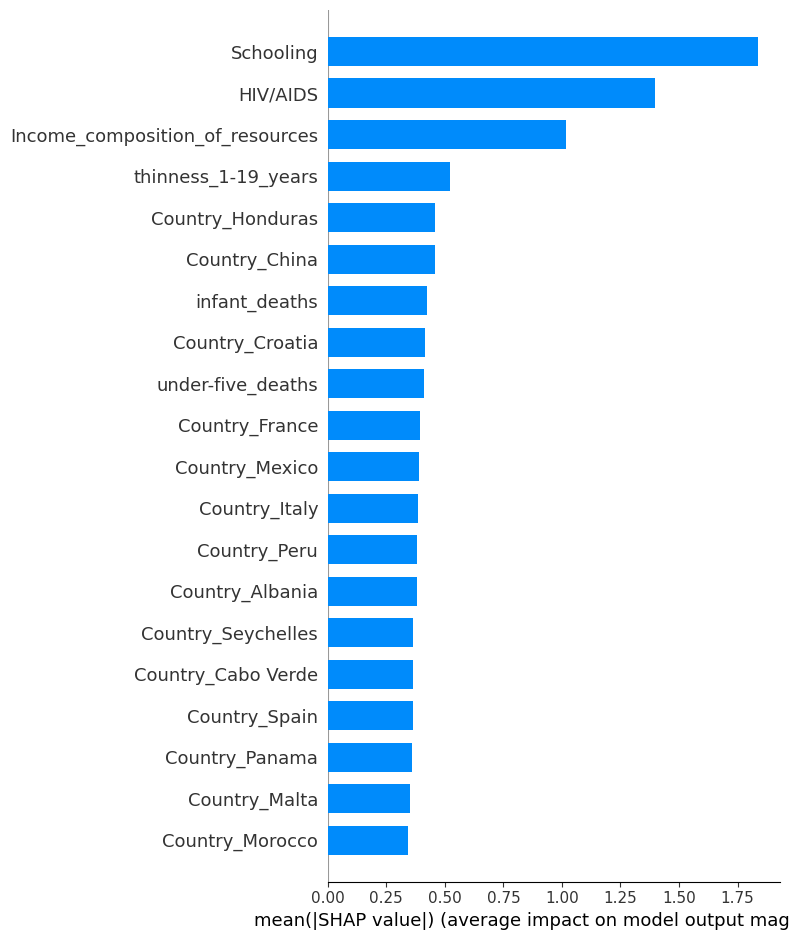

In [24]:
shap.summary_plot(deep_shap_values[0], plot_type = 'bar', feature_names = X.columns)

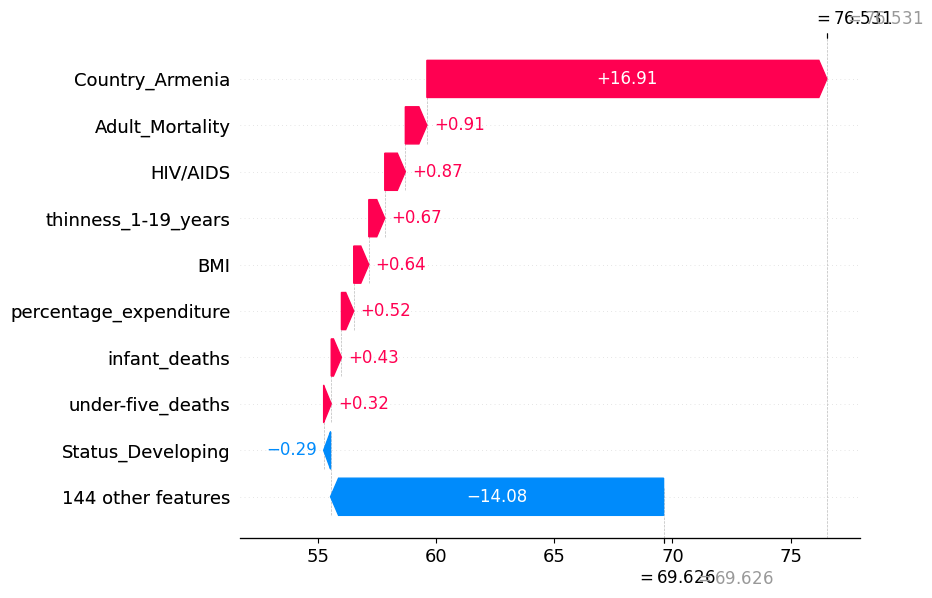

In [25]:
shap.plots._waterfall.waterfall_legacy(deep_explainer.expected_value[0].numpy(), deep_shap_values[0][0], feature_names = X.columns)

## Kernel SHAP

In [26]:
kernel_explainer = shap.KernelExplainer(model, x_train)
kernel_shap_values = kernel_explainer.shap_values(x_test, nsamples = 160)

  0%|          | 0/165 [00:00<?, ?it/s]

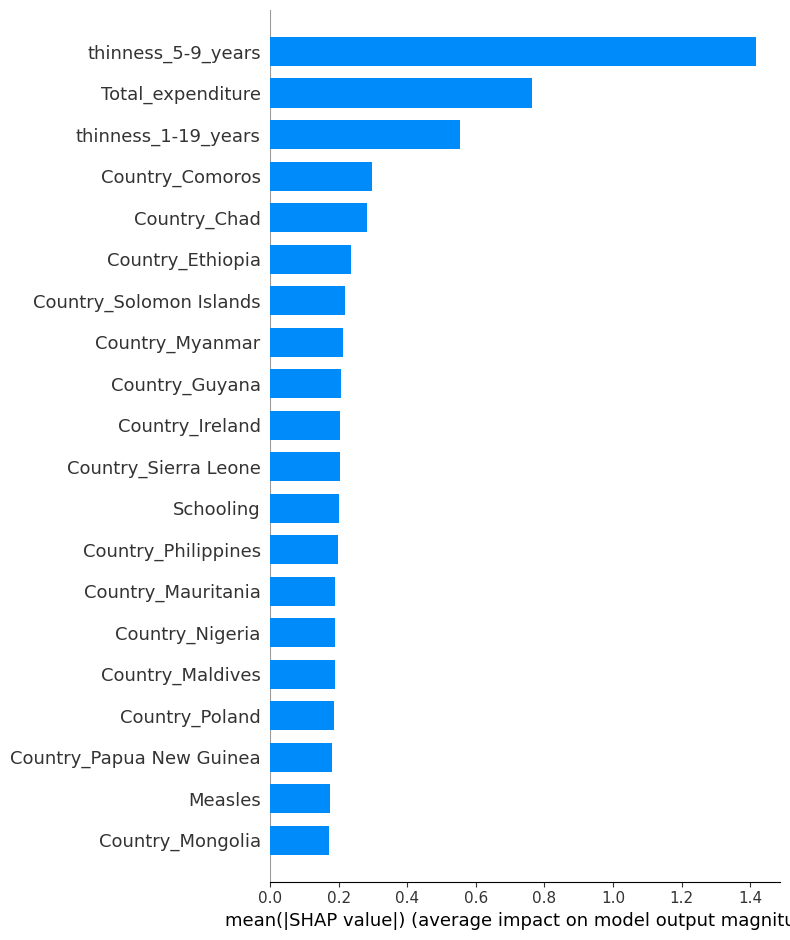

In [27]:
shap.summary_plot(kernel_shap_values[0], plot_type = 'bar', feature_names = data1.columns)

In [28]:
# shap.plots._waterfall.waterfall_legacy(kernel_explainer.expected_value[0].numpy(), kernel_shap_values[0][0], feature_names = data1.columns)

In [29]:
pd.unique(data['Country'])

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

## Forceplot for two countries

In [30]:
c1 = 0 # Armenia
c2 = 4 # Turkmenistan
shap.initjs()
shap.force_plot(deep_explainer.expected_value[0].numpy(), deep_shap_values[0][c1], features = X_test.columns)

In [31]:
shap.initjs()
shap.force_plot(deep_explainer.expected_value[0].numpy(), deep_shap_values[0][c2], features = X_test.columns)

In [36]:
for i in range(len(X_test)):
  for col in X_test.columns:
    if col.startswith('Country_'):
      if X_test.loc[i,col] == 1:
        print(i,col)

KeyError: ignored